### 02.3 梯度下降

#### 2.3.3 单变量函数的梯度下降

单变量函数：$J(x) = x ^2$  
迭代公式：$$x_{n+1} = x_{n} - \eta \cdot \nabla J(x)= x_{n} - \eta \cdot 2x$$
初始化$x$,学习率和误差：

In [186]:
import numpy as np
import matplotlib.pyplot as plt

x = 1.2
eta = 0.3
error = 1e-3

求解目标函数：

In [187]:
def target_function(x):
    y = x*x
    return y
y = target_function(x)
print(y)

1.44


获取导数：

In [188]:
def derivative_function(x):
    return 2*x
print(derivative_function(x))

2.4


开始梯度下降：

In [189]:
X = []
X.append(x)
y = target_function(x)
#如果y比误差大的话，就继续循环
while y > error:
    #计算下降量
    x = x - eta * derivative_function(x)
    X.append(x)
    #更新y的值
    y = target_function(x)
    print("x=%f, y=%f" %(x,y))

x=0.480000, y=0.230400
x=0.192000, y=0.036864
x=0.076800, y=0.005898
x=0.030720, y=0.000944


经过了四次迭代，下降到了最低点。画出下降的图像：

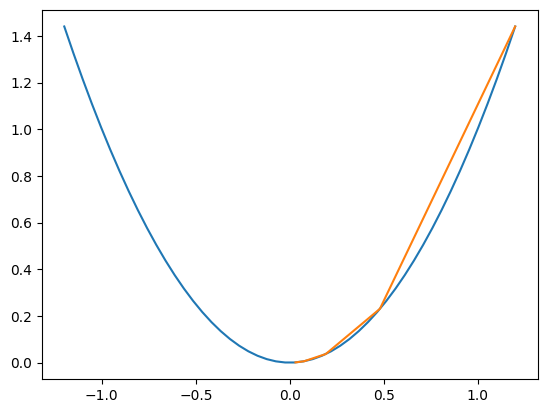

In [190]:
#绘制函数曲线
x = np.linspace(-1.2,1.2)
y = target_function(x)
plt.plot(x,y)
#绘制下降轨迹
Y = []
for i in range(len(X)):
    Y.append(target_function(X[i]))
plt.plot(X,Y)
plt.show()

#### 2.3.4 双变量的梯度下降
双变量函数：
$J(x,y) = x^2 + \sin^2(y)$  
迭代公式：  
$$
(x_{n+1},y_{n+1}) = (x_n,y_n) - \eta \cdot \nabla J(x,y)
$$

$$
 = (x_n,y_n) - \eta \cdot (2x,2 \cdot \sin y \cdot \cos y) \tag{1}
$$
初始化$x,y$,学习率和误差：

In [191]:
#使用theta数组来表示初始的x，y值
theta = np.array([3,1])
eta = 0.1
error = 1e-2
#绘图用数组
X = []
Y = []
Z = []

函数求值和求导：

In [192]:
def target_function(x,y):
    J = x**2 + np.sin(y)**2
    return J

def derivative_function(theta):
    x = theta[0]
    y = theta[1]
    return np.array([2*x,2*np.sin(y)*np.cos(y)])

print(target_function(theta[0],theta[1]))
print(derivative_function(theta))

9.708073418273571
[6.         0.90929743]


开始梯度下降：

In [193]:
for i in range(100):
        print(theta)
        x=theta[0]
        y=theta[1]
        z=target_function(x,y)
        X.append(x)
        Y.append(y)
        Z.append(z)
        print("第%d次下降: x=%f, y=%f, z=%f" %(i,x,y,z))
        d_theta = derivative_function(theta)
        print("    ",d_theta)
        #计算下降量
        theta = theta - eta * d_theta
        #检测误差
        if z < error:
            break

[3 1]
第0次下降: x=3.000000, y=1.000000, z=9.708073
     [6.         0.90929743]
[2.4        0.90907026]
第1次下降: x=2.400000, y=0.909070, z=6.382415
     [4.8        0.96956606]
[1.92       0.81211365]
第2次下降: x=1.920000, y=0.812114, z=4.213103
     [3.84      0.9985729]
[1.536      0.71225636]
第3次下降: x=1.536000, y=0.712256, z=2.786415
     [3.072      0.98931962]
[1.2288    0.6133244]
第4次下降: x=1.228800, y=0.613324, z=1.841252
     [2.4576     0.94136341]
[0.98304    0.51918806]
第5次下降: x=0.983040, y=0.519188, z=1.212558
     [1.96608    0.86158105]
[0.786432   0.43302995]
第6次下降: x=0.786432, y=0.433030, z=0.794559
     [1.572864   0.76178233]
[0.6291456  0.35685172]
第7次下降: x=0.629146, y=0.356852, z=0.517853
     [1.2582912  0.65463784]
[0.50331648 0.29138794]
第8次下降: x=0.503316, y=0.291388, z=0.335858
     [1.00663296 0.55034373]
[0.40265318 0.23635356]
第9次下降: x=0.402653, y=0.236354, z=0.216960
     [0.80530637 0.45529821]
[0.32212255 0.19082374]
第10次下降: x=0.322123, y=0.190824, z=0.139737
     

经过16次梯度下降，到达最低点。绘制下降图像：

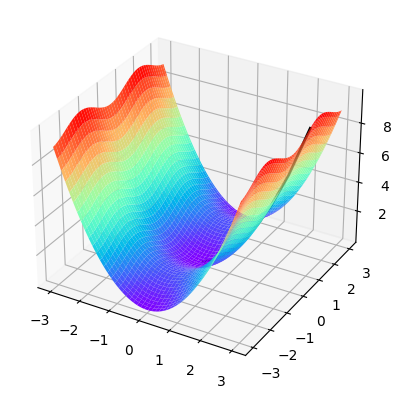

In [194]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
u = np.linspace(-3, 3, 100)
v = np.linspace(-3, 3, 100)
#将u,v转成矩阵
XM, YM = np.meshgrid(u, v)
#生成零矩阵
R = np.zeros((len(u), len(v)))
#绘制函数图像
for i in range(len(u)):
        for j in range(len(v)):
            R[i, j] = XM[i, j]**2 + np.sin(YM[i, j])**2
ax.plot_surface(XM, YM, R, cmap='rainbow')
#绘制下降轨迹
plt.plot(X,Y,Z, linewidth=2, color='black')
plt.show()